In [ ]:
import cv2
import torch
import clip
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import os

# Load the CLIP model and set up the device
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load('ViT-L/14', device)

# Set the path to the folder containing the classes (labels)
folder_path = "D:/done/Test"
classes = os.listdir(folder_path)

# Function to get predictions for a given image
def get_predictions_for_frame(frame):
    # Prepare the inputs
    image = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    image_input = preprocess(image).unsqueeze(0).to(device)

    text_inputs = torch.cat([clip.tokenize(f"a photo of a {c}") for c in classes]).to(device)

    # Calculate features
    with torch.no_grad():
        image_features = model.encode_image(image_input)
        text_features = model.encode_text(text_inputs)

    # Normalize features
    image_features /= image_features.norm(dim=-1, keepdim=True)
    text_features /= text_features.norm(dim=-1, keepdim=True)

    # Calculate similarity and get top predictions
    similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)
    values, indices = similarity[0].topk(1)

    # Return the top prediction
    return values[0].item(), classes[indices[0]]

# Function to process live video feed
def process_live_video(confidence_threshold=0.20):
    cap = cv2.VideoCapture(0)  # 0 corresponds to the default camera (usually the built-in webcam)

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Get predictions for the current frame
        confidence, predicted_class = get_predictions_for_frame(frame)

        # Check if the confidence exceeds the threshold
        if confidence > confidence_threshold:
            # Display the frame using matplotlib
            plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            plt.title(f"Predicted class: {predicted_class}, Confidence: {confidence:.2f}%")
            plt.show()

        # Break the loop if 'q' key is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

# Process the live video feed
process_live_video()

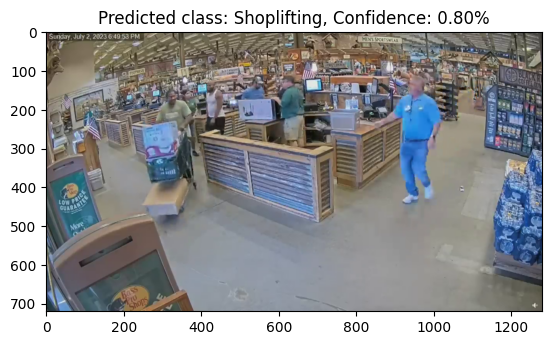

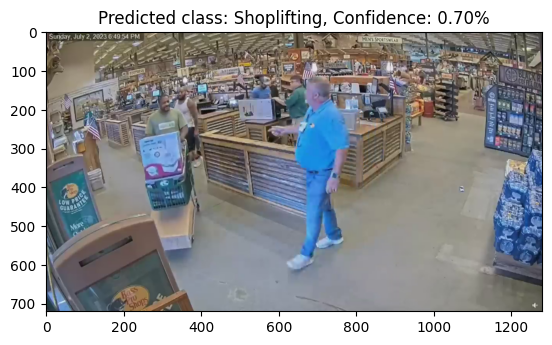

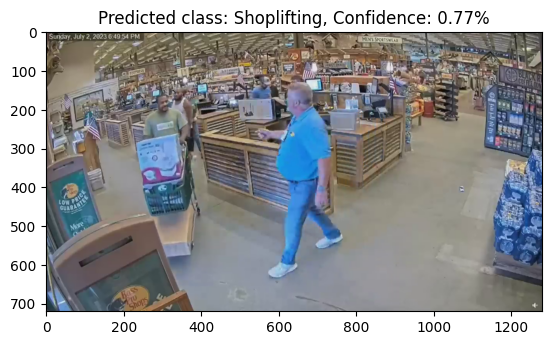

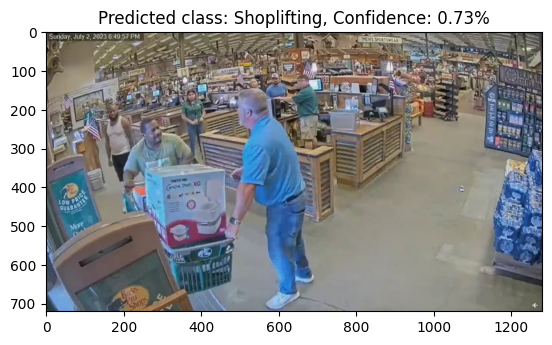

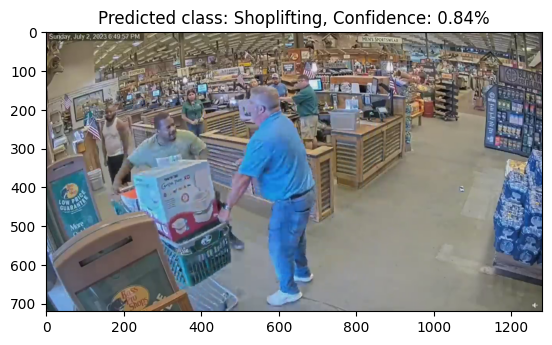

In [7]:
import os
import clip
import torch
from torchvision.datasets import CIFAR100
from torchvision import transforms
from PIL import Image
import cv2
import matplotlib.pyplot as plt

# Load the CLIP model and set up the device
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load('ViT-L/14', device)

# Set the path to the folder containing the classes (labels)
folder_path = "D:/done/Test"
classes = os.listdir(folder_path)

# Function to get predictions for a given image
def get_predictions_for_frame(frame):
    # Prepare the inputs
    image = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    image_input = preprocess(image).unsqueeze(0).to(device)

    text_inputs = torch.cat([clip.tokenize(f"a photo of a {c}") for c in classes]).to(device)

    # Calculate features
    with torch.no_grad():
        image_features = model.encode_image(image_input)
        text_features = model.encode_text(text_inputs)

    # Normalize features
    image_features /= image_features.norm(dim=-1, keepdim=True)
    text_features /= text_features.norm(dim=-1, keepdim=True)

    # Calculate similarity and get top predictions
    similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)
    values, indices = similarity[0].topk(1)

    # Return the top prediction
    return values[0].item(), classes[indices[0]]

# Function to process a video
def process_video(video_path, confidence_threshold=0.70, output_filename='output_video.mp4'):
    cap = cv2.VideoCapture(video_path)

    frame_count = 0
    frames_to_save = []

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        frame_count += 1

        # Skip frames until the 5th frame
        if frame_count % 5 != 0:
            continue

        # Get predictions for the current frame
        confidence, predicted_class = get_predictions_for_frame(frame)

        # Check if the confidence exceeds the threshold
        if confidence > confidence_threshold:
            # Save the frame to the list
            frames_to_save.append(frame)

            # Display the frame using matplotlib
            plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            plt.title(f"Predicted class: {predicted_class}, Confidence: {confidence:.2f}%")
            plt.show()

    cap.release()

    # Save frames to an output video file
    height, width, _ = frames_to_save[0].shape
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_filename, fourcc, 5.0, (width, height))

    for frame_to_save in frames_to_save:
        out.write(frame_to_save)

    out.release()

# Specify the path to your video file
video_path = 'Man shoves off Bass Pro Shops employee as 2 suspects steal over $2,600 in merchandise in Gwinnett.mp4'

# Specify the output filename for the saved video
output_filename = 'output_video.mp4'

# Process the video and save frames
process_video(video_path, output_filename=output_filename)
